In [373]:
import pandas as pd
import numpy as np

In [374]:
cctv_seoul = pd.read_csv('cctv_data_collect/cctv_seoul.csv',encoding='utf8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [375]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [376]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'},inplace=True)

In [377]:
pop_seoul = pd.read_excel('cctv_data_collect/pop_seoul.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [378]:
#행과 열을 한정해서 일부만 가져와보자.
pop_seoul = pd.read_excel('cctv_data_collect/pop_seoul.xls',
                         header = 2,
                         usecols='B,D,G,J,N'
                         )
pop_seoul.head()#header = 2 번 인덱스 행부터 가져옴.

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [379]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [380]:
#cctv가 제일 많이 설치된 구와 제일 적게 설치되어 있는 구 정렬
cctv_seoul.sort_values(by='소계').head()#ascending(오름차순)이 디폴트

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [381]:
cctv_seoul.sort_values(by='소계').tail()#ascending(오름차순)이 디폴트

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,1624,1368,218,112,398
21,은평구,1873,1138,224,278,468
14,서초구,1930,1406,157,336,398
18,양천구,2034,1843,142,30,467
0,강남구,2780,1292,430,584,932


In [382]:
#내림차순으로 바꿔보자.
cctv_seoul.sort_values(by='소계',ascending=False).head()#decending(내림차순)이 디폴트

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [383]:
cctv_seoul.sort_values(by='소계',ascending=False).tail()#decending(내림차순)이 디폴트

,구별,소계,2013년도 이전,2014년,2015년,2016년
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109
17,송파구,618,529,21,68,463
12,마포구,574,314,118,169,379
9,도봉구,485,238,159,42,386


In [384]:
#인구수의 컬럼을 '구별','인구수','한국인','외국인','고령자'로 컬럼을 바꿔보자.
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [385]:
# pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
#                           pop_seoul.columns[1]:'인구수',
#                           pop_seoul.columns[2]:'한국인',
#                           pop_seoul.columns[3]:'외국인',
#                           pop_seoul.columns[4]:'고령자'},inplace=True)
#일부 컬럼명만 바꿀때 쓰는방법

In [386]:
#합계라고 되어있는 행을 삭제
pop_seoul.drop([0],inplace=True)#index
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [387]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [388]:
pop_seoul['구별']

1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
26     NaN
Name: 구별, dtype: object

In [389]:
len(pop_seoul['구별'].unique())#구별 열에 유니크한 값 개수

26

In [390]:
pop_seoul.tail(2)

,구별,인구수,한국인,외국인,고령자
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [391]:
pop_seoul.iloc[25]#nan값들이 들어있어서 필요가 없다.

구별     NaN
인구수    NaN
한국인    NaN
외국인    NaN
고령자    NaN
Name: 26, dtype: object

In [392]:
pop_seoul.isnull().sum()
#pop_seoul['구별'].isnull().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [393]:
pop_seoul.drop([26],inplace = True)

In [394]:
pop_seoul.isnull().sum()#이제 null값이 없다! 다 지워버림.

구별     0
인구수    0
한국인    0
외국인    0
고령자    0
dtype: int64

In [395]:
#외국인비율, 고령자비율 파생변수 2개를 만들어봐요~
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852


In [396]:
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [397]:
pop_seoul.sort_values(by='인구수',ascending=False).head()#체인식코드

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [398]:
pop_seoul.sort_values(by='인구수').head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [399]:
#고령자 비율, 외국인 비율이 낮은 구는 어디인가?
pop_seoul.sort_values(by='고령자비율').head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
22,서초구,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308


In [400]:
pop_seoul.sort_values(by='외국인비율').head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [401]:
#고령자 비율, 외국인 비율이 높은 구는 어디인가?
pop_seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [402]:
pop_seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [403]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [404]:
#cctv최근 증가률이 높은 곳과 낮은 곳
cctv_seoul['최근증가율'] = (cctv_seoul['2014년'] + cctv_seoul['2015년']
                       + cctv_seoul['2016년'])/ cctv_seoul['2013년도 이전']*100
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [405]:
cctv_seoul.sort_values(by='최근증가율',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [406]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'},inplace=True)
cctv_seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


In [407]:
#머지 함수를 사용해서 데이터프레임 합치기
data_result = pd.merge(cctv_seoul,pop_seoul,on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [408]:
data_result.drop(columns=['2014년','2015년','2016년'],inplace=True)
#del data_result['2014년']
data_result.head(3)

,구별,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [286]:
data_result['구별'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [287]:
type(data_result['구별'].unique())#ndarray는 n차원 리스트를 다루기위한 객체

numpy.ndarray

In [288]:
#1차원 ndarray객체는 1차원 list이므로 list처럼 다루면 된다.
#list, str은 len함수 쓰면됨

In [289]:
len(data_result['구별'].unique())#유니크한 값은 인덱스로 잡을 수 있다.

25

In [290]:
#reset_index(): 현재 index로 잡혀져 있는 정수값이 merge나 join등 df의 병합과 같은 처리로 인해
#순서대로 들어있지 않은 경우, 다시 순서대로 인덱스 값이 정렬 되도록 함.
#a_df_index = [1,2,3], b_df_index = [1,2,3]일 때 
#a_df_index = [1,2,3] + b_df_index = [1,2,3] 의 결과는 [1,2,3,1,2,3]이 된다. 중복된 값이 됨.
#reset_index()하면 중복값이 없어지고 [0,1,2,3,4,5]이 된다.

#set_index(): 특정한 unique한 값을 가지는 컬럼을 index로 설정하고자 하는 경우

data_result.set_index('구별',inplace=True)

In [291]:
data_result.head()

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [292]:
#고령자비율,소계의 상관관계
old = np.corrcoef(data_result['고령자비율'],data_result['소계'])
old
#고령자비율이 높으면 30퍼센트 관계성으로 cctv수가 적어진다.(반비례)
#결과: 고령자 비율이 높다고 해서 cctv가 많이 설치되었다고는 일반적으로 말할 수 없다.
#      고령자 비율과 cctv설치수는 약간 음의 상관이 있긴 함.

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [293]:
#외국인 비율, 소계의 상관관계
out = np.corrcoef(data_result['외국인비율'],data_result['소계'])
out
#결과: 외국인 비율이 높다고 해서 cctv개수가 많아지는 것은 아니다. 
#      외국인 비율과 cctv설치수는 거의 관계성이 없다.
#     외국인이 많은 구가 cctv가 많이/적게 설치되었다고 할 수 없다.

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [294]:
#인구수, 소계(cctv의 개수)의 상관관계
tot_pop = np.corrcoef(data_result['인구수'],data_result['소계'])
tot_pop
#결과: 인구수가 많으면 cctv수도 많아지는 관계성이 30퍼센트 정도 존재한다.
#      양의 관계성을 가지고 조금의 관계성이 있다고 볼 수 있다.

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [295]:
#최근증가율, 소계(cctv의 개수)의 상관관계
np.corrcoef(data_result['최근증가율'],data_result['소계'])
#결과: 최근증가율이 높아지만 cctv수는 반비례 해진다.
#       음의 30퍼센트 정도의 관계성이 있고, 조금의 관계성이 있다고 볼 수 있다.

array([[ 1.      , -0.343016],
       [-0.343016,  1.      ]])

In [296]:
pop_seoul['인구수']

1     162820.0
2     133240.0
3     244203.0
4     311244.0
5     372164.0
6     369496.0
7     414503.0
8     461260.0
9     330192.0
10    348646.0
11    569384.0
12    494388.0
13    327163.0
14    389649.0
15    479978.0
16    603772.0
17    447874.0
18    255082.0
19    402985.0
20    412520.0
21    525515.0
22    450310.0
23    570500.0
24    667483.0
25    453233.0
Name: 인구수, dtype: float64

In [297]:
pop_seoul['구별'].duplicated().sum()

0

In [298]:
#ndarray가 tolist적용이 되는가?(리스트로 변환시켜주는 함수)
tot_list = tot_pop.tolist()
tot_list

[[0.9999999999999999, 0.30634227936792635], [0.3063422793679263, 1.0]]

In [299]:
tot_list[0]

[0.9999999999999999, 0.30634227936792635]

In [300]:
tot_list[0][1]

0.30634227936792635

In [301]:
fst_list = [1, 2, 3]#1ndarray,Series,1nd list(1차원)
fst_list

[1, 2, 3]

In [302]:
fst_list[0]

1

In [303]:
#인덱스: 0부터 시작
snd_list = [#열
    [1, 2, 3],#행
    [4, 5, 6]
]#2차원#df.values등이 2차원이다.

In [304]:
snd_list[0][0]#0행0열

1

In [305]:
snd_list[1][1] = 9
snd_list

[[1, 2, 3], [4, 9, 6]]

In [306]:
tot_list

[[0.9999999999999999, 0.30634227936792635], [0.3063422793679263, 1.0]]

In [307]:
tot_corr = tot_list[0][1]#전체 인구수 상관계수
tot_corr

0.30634227936792635

In [308]:
out_list = out.tolist()
out_list

[[0.9999999999999998, -0.13607432878194445], [-0.13607432878194445, 1.0]]

In [309]:
out_corr = out_list[0][1]#전체 인구수 상관계수
out_corr

-0.13607432878194445

In [310]:
old_list = old.tolist()
old_list

[[1.0, -0.28078553790050065], [-0.2807855379005007, 1.0]]

In [311]:
old_corr = old_list[0][1]#전체 인구수 상관계수
old_corr

-0.28078553790050065

In [312]:
list(tot_pop)

[array([1.        , 0.30634228]), array([0.30634228, 1.        ])]

In [313]:
list(pop_seoul['인구수'])#시리즈를 리스트로 변환.

[162820.0,
 133240.0,
 244203.0,
 311244.0,
 372164.0,
 369496.0,
 414503.0,
 461260.0,
 330192.0,
 348646.0,
 569384.0,
 494388.0,
 327163.0,
 389649.0,
 479978.0,
 603772.0,
 447874.0,
 255082.0,
 402985.0,
 412520.0,
 525515.0,
 450310.0,
 570500.0,
 667483.0,
 453233.0]

In [314]:
#한국인, 외국인, 고령자수를 비교할 수 있게 그래프로 그려보세요.
corr_3_list = [tot_corr, old_corr, out_corr] #1ndArray, Series
corr_3_list

[0.30634227936792635, -0.28078553790050065, -0.13607432878194445]

In [315]:
x_data = ['tot_corr', 'old_corr', 'out_corr']

In [316]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'correlation')

C:\Users\aaa77\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aaa77\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


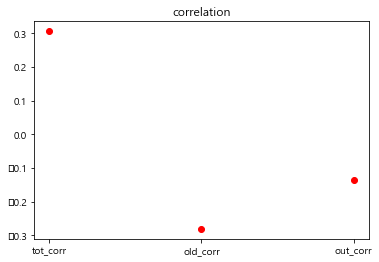

In [317]:
fig = plt.plot(x_data, corr_3_list, 'ro')
plt.title('correlation')

In [318]:
#세가지의 상관도를 그래프로 비교해보고 싶음.

In [319]:
data_result.columns

Index(['소계', '2013년도 이전', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율',
       '고령자비율'],
      dtype='object')

In [320]:
data_result.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구별')

In [321]:
# 강남구의 한국인, 외국인, 고령자 수를 비교할 수 있게 그래프로 그려보세요.
kangnam = data_result[data_result.index == '강남구']
kangnam

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.86766,11.072217


In [322]:
#이거 임포트 해줘야 차트에서 오류안남. 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

Text(0.5, 1.0, 'person count')

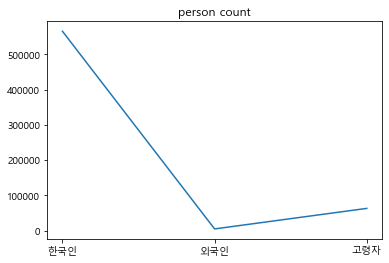

In [323]:
fig = plt.plot(['한국인', '외국인', '고령자'],[565550.0,4950.0,63167.0])
plt.title('person count')

In [324]:
#최근증가율과 소계의 상관관계
dr_corr = data_result.corr()
dr_corr

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.862756,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
2013년도 이전,0.862756,1.000000,-0.652747,0.168177,0.163142,0.048973,0.105379,-0.038732,-0.257255
최근증가율,-0.343016,-0.652747,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,0.168177,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,0.163142,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,0.048973,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,0.105379,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.038732,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,-0.257255,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


In [325]:
#최근증가율과 소계의 상관관계
data_result.corr()

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.862756,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
2013년도 이전,0.862756,1.000000,-0.652747,0.168177,0.163142,0.048973,0.105379,-0.038732,-0.257255
최근증가율,-0.343016,-0.652747,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,0.168177,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,0.163142,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,0.048973,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,0.105379,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.038732,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,-0.257255,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


In [326]:
#heapmap, pairplot

In [327]:
data_result.columns

Index(['소계', '2013년도 이전', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율',
       '고령자비율'],
      dtype='object')

In [328]:
import seaborn as sns
cols = data_result.columns

C:\Users\aaa77\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aaa77\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

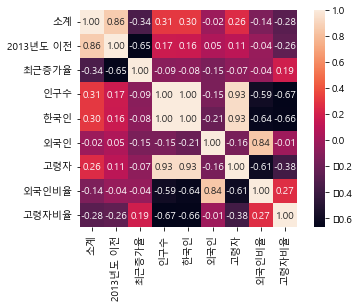

In [329]:
sns.heatmap(dr_corr.values,
            cbar = True,
            annot= True,
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

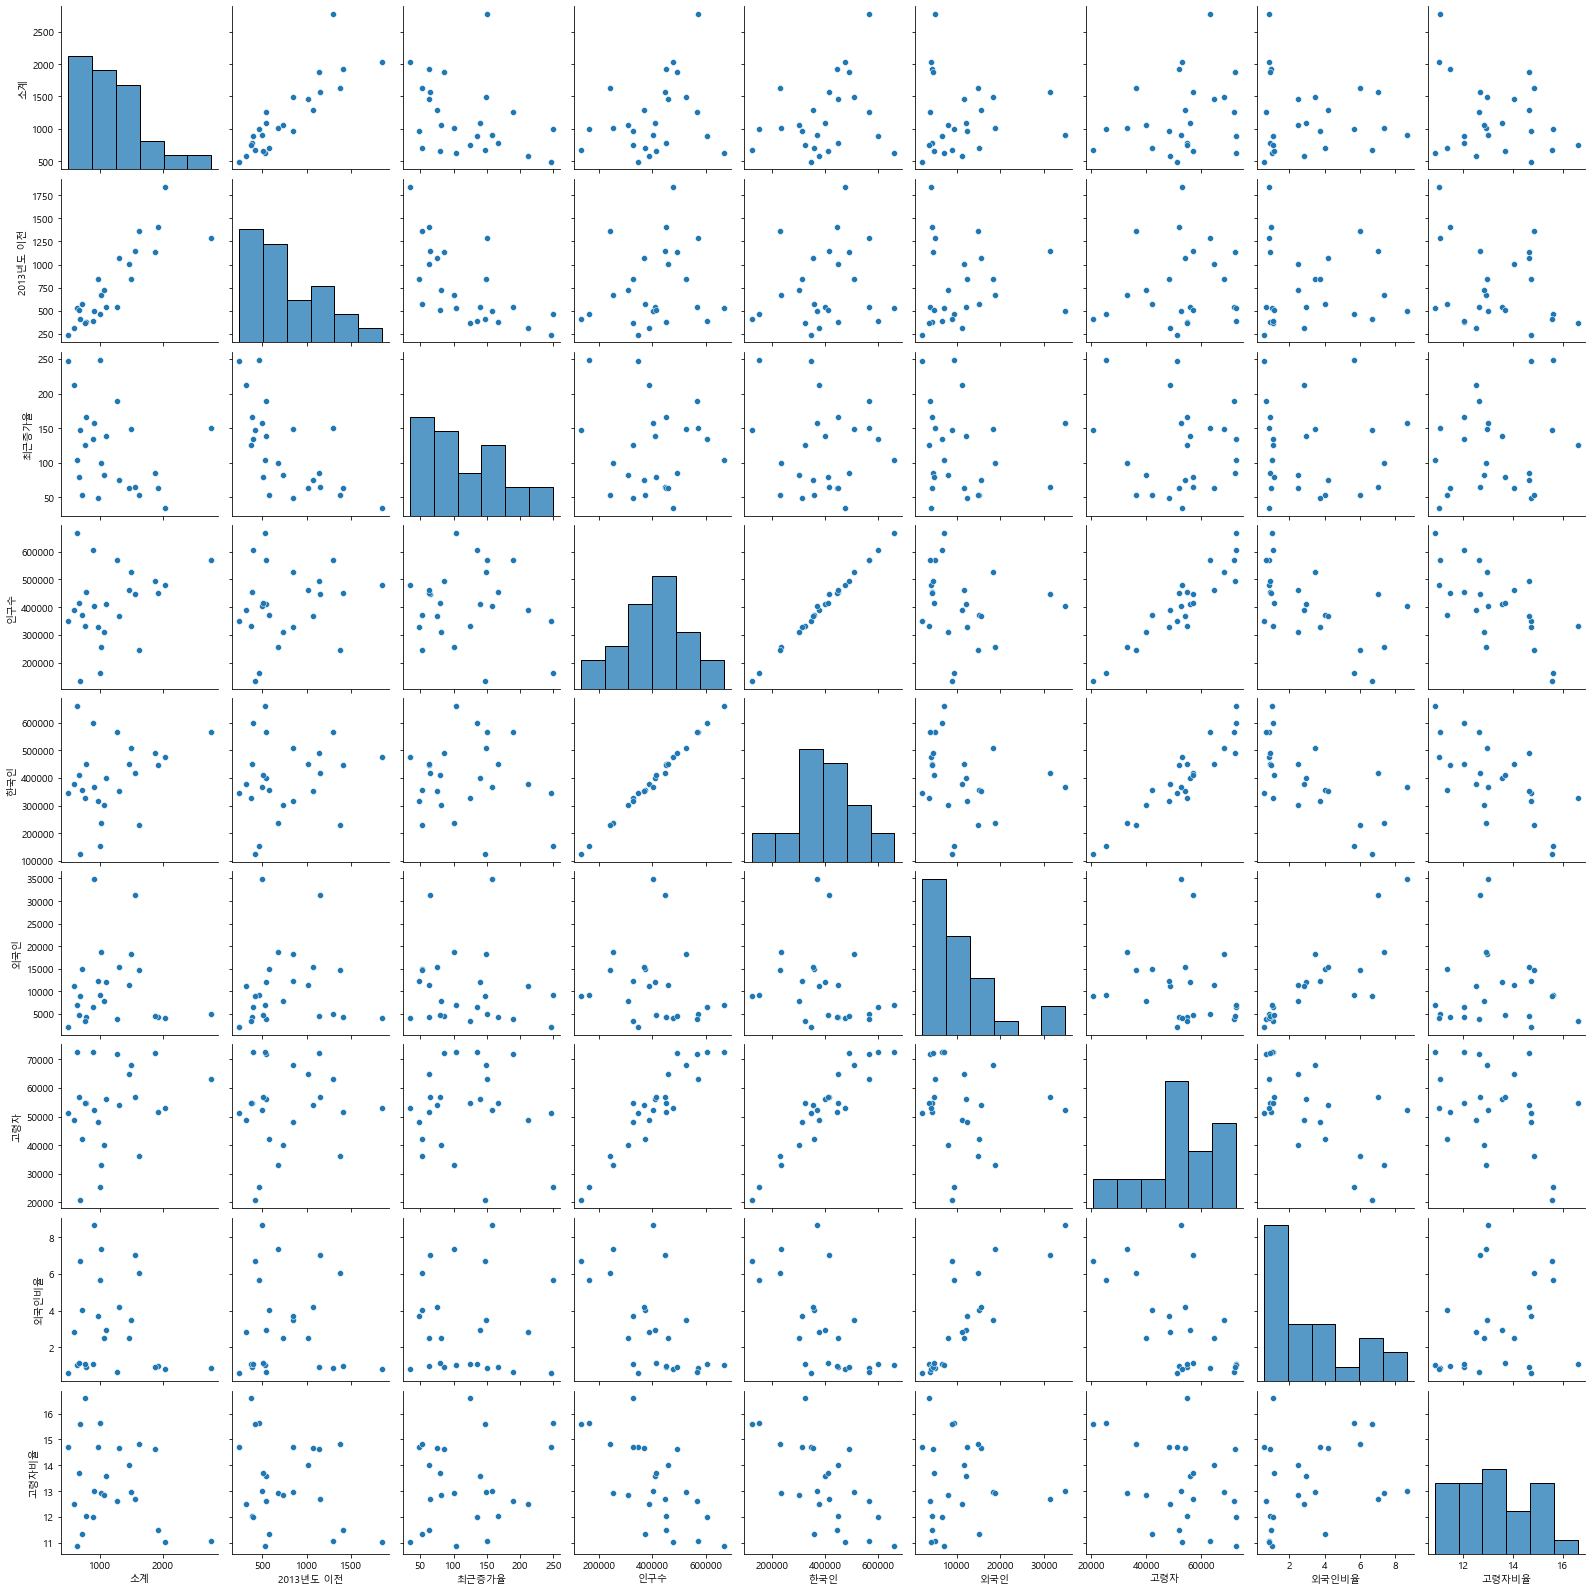

In [330]:
sns.pairplot(data_result, height=2.5)
plt.show()

In [ ]:
data_result['소계'].sort_values().plot(kind = 'bar'
                    ,grid=True, figsize=(10,10))
                         

In [ ]:
#인구당 cctv비율을 구해서 정렬 후, 그래프를 그려보세요
#인구당 cctv비율을 파생변수로 만들어두시고,
#파생변수로 정렬하여, 그래프를 그리세요!
data_result['cctv비율'] = data_result['소계']/data_result['인구수']*100
data_result['cctv비율'].sort_values().plot(kind= 'barh'
                    ,grid=True, figsize=(10,10))

Text(400000, 2500, '야야야')

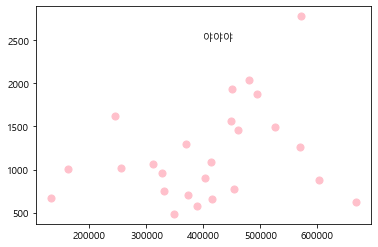

In [343]:
#산점도
plt.scatter(data_result["인구수"],data_result['소계'], s=50, c='pink')#s는 점의 크기
plt.text(400000, 2500,'야야야')

In [344]:
##x,y축으로 사용할 데이터를 주고, 1차 방정식으로 표현했을 때
##기울기와 y절편을 구해주세요.polyfit()
pf1 = np.polyfit(data_result['인구수'],data_result['소계'],1)#이 둘의 적힙한 1차 방정식을 찾는 방법(polyfit)
pf1#기울기와 y절편이 나옴

array([1.30916415e-03, 6.45066497e+02])

In [345]:
#위에서 구한 기울기와 절편으로 함수를 만들어주세요!
f1 = np.poly1d(pf1)
f1

poly1d([1.30916415e-03, 6.45066497e+02])

In [346]:
fx = np.linspace(100000, 700000, 100)
fx[:5]

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242])

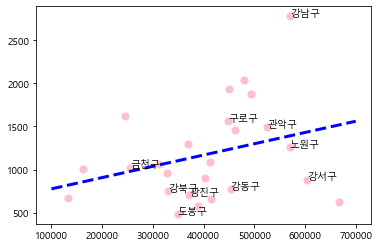

In [347]:
plt.scatter(data_result["인구수"],data_result['소계'], s=50, c='pink')#s는 점의 크기
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='b')#회귀선:예측판단을 하는 선
for n in range(10):
    plt.text(data_result['인구수'][n],#글자가 쓰여질 x축 좌표
            data_result['소계'][n],#그자가 쓰여질 y축 좌표
            data_result.index[n],#쓰여질 글자
            fontsize=10)
# plt.text(400000, 2500,'야야야')

In [348]:
#판단선(회귀선):예측과 분류의 기준이 되는 선!
#판단선은 방정식,1차 방정식이라고 한다면 기울기와 절편이 필요

In [349]:
#위 그래프는 무엇을 나타내는가?
#인구수 대비(x축) cctv의 개수를 보여준다.
#관계성이 있다는 것을 그래프를 보고 알 수 있다.

#cctv를 어느 구에 설치해야하는가?
#판단선: 인구수에 적절한 cctv수를 판단하는 선
# 판단선 위에 위치한 구는 이미 인구수에 비해 cctv가 많이 설치된 구
# 판단선 아래에 위치한 구는 인구수에 비해 cctv가 설치가 부족한 구
# 판단선 아래에 있는 구에 cctv를 설치를 하자.
# 판단선과 점 사이의 오차가 큰 순으로 먼저 선별
#강북구,광진구,도봉구,강동구,강서구 등 cctv더 설치해야함


#판단기준: 인구수와 cctv와 관련이 있다라는 기준.



In [350]:
# 판단선과 점 사이의 오차가 큰 순으로 먼저 선별
#판단선의 값들이 필요=> f1(data_result['인구수'])
#현재 값들이 필요=> data_result['소계']
data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head()

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,529,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,1843,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,1406,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,1368,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


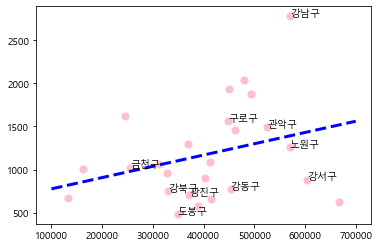

In [351]:
plt.scatter(data_result["인구수"],data_result['소계'], s=50, c='pink')#s는 점의 크기
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='b')#회귀선:예측판단을 하는 선
for n in range(10):
    plt.text(data_result['인구수'][n],#글자가 쓰여질 x축 좌표
            data_result['소계'][n],#그자가 쓰여질 y축 좌표
            data_result.index[n],#쓰여질 글자
            fontsize=10)
# plt.text(400000, 2500,'야야야')

In [353]:
crime_seoul = pd.read_csv('cctv_data_collect/crime_seoul_2.csv',encoding='euc-kr')#윈도우에서 연거라euc-kr로 열어야함
crime_seoul.head()

,구별,살인 발생,강도 발생,강간 발생,절도 발생,폭력 발생
0,중구,2,3,105,1395,1355
1,종로구,3,6,115,1070,1278
2,중구,1,6,65,1153,869
3,서대문구,2,5,154,1812,2056
4,종로구,3,5,96,1114,1015


In [354]:
#cctv와 범죄율 데이터를 가지고 다양한 데이터분석을 해보세요
#10개이상!

In [ ]:
#1. 구별 폭력 발생, 폭력 검거 구하기
#2. 위 두 컬럼을 heatmap이랑 pairplot그리기. 
#3.5대 범죄의 평균
#각 범죄가 많은 구 로 정렬
#merge이용해서 아까했던 cctv데이터프레임이랑 합쳐보기


In [356]:
crime_seoul['구별'].unique()

array(['중구', '종로구', '서대문구', '용산구', '성북구', '동대문구', '마포구', '영등포구', '성동구',
       '동작구', '광진구', '은평구', '강북구', '금천구', '중랑구', '강남구', '관악구', '강서구',
       '강동구', '구로구', '서초구', '양천구', '송파구', '노원구', '도봉구'], dtype=object)

In [357]:
len(crime_seoul['구별'].unique())

25

In [358]:
crime_seoul.shape

(31, 6)

In [359]:
crime_seoul2 = pd.pivot_table(crime_seoul,index='구별',aggfunc=np.sum)#그룹별로 중복된 구를 더해서 테이들 생성
crime_seoul2

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생
구별,,,,,
강남구,449,21,13,3850,4284
강동구,156,6,4,2366,2712
강북구,153,14,7,1434,2649
강서구,262,13,7,2096,3207
관악구,320,12,9,2706,3298
광진구,240,14,4,3026,2625
구로구,281,15,8,2335,3007
금천구,151,6,3,1567,2054
노원구,197,7,10,2193,2723


In [360]:
len(crime_seoul2.index)

25

In [362]:
data_result.head()

,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,,
강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [363]:
data_result.to_csv('cctv+pop+data_result.csv',encoding='utf8')

In [365]:
cctv_pop_data_result = pd.read_csv('cctv+pop+data_result.csv',encoding='utf8')
cctv_pop_data_result.head()

,구별,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
0,강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
1,강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
2,강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
3,강서구,884,388,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
4,관악구,1496,846,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [368]:
cctv_pop_data_result.rename(columns={cctv_seoul.columns[1]:'cctv개수'},inplace=True)
cctv_pop_data_result.head(3)

,구별,cctv개수,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
0,강남구,2780,1292,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
1,강동구,773,379,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
2,강북구,748,369,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026


In [412]:
#1. 구별 폭력 발생, 폭력 검거 구하기. 그리고 수가 많은 정도로 정렬
crime_seoul2['폭력 발생']
print(crime_seoul2.sort_values(by='폭력 발생',ascending=False).head())
crime_seoul2.sort_values(by='절도 발생',ascending=False).head()


      강간 발생  강도 발생  살인 발생  절도 발생  폭력 발생
구별                                     
강남구     449     21     13   3850   4284
영등포구    295     22     14   2964   3572
관악구     320     12      9   2706   3298
송파구     220     13     11   3239   3295
강서구     262     13      7   2096   3207


,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생
구별,,,,,
강남구,449,21,13,3850,4284
송파구,220,13,11,3239,3295
광진구,240,14,4,3026,2625
영등포구,295,22,14,2964,3572
관악구,320,12,9,2706,3298


In [413]:
#2. 위 두 컬럼을 heatmap그리기
#3. pairplot그리기. 
cr_corr = crime_seoul2.corr()
cr_corr

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생
강간 발생,1.000000,0.617927,0.630405,0.746281,0.670667
강도 발생,0.617927,1.000000,0.674517,0.574428,0.690986
살인 발생,0.630405,0.674517,1.000000,0.623768,0.768140
절도 발생,0.746281,0.574428,0.623768,1.000000,0.804446
폭력 발생,0.670667,0.690986,0.768140,0.804446,1.000000


In [415]:
cols = crime_seoul2.columns
cols

Index(['강간 발생', '강도 발생', '살인 발생', '절도 발생', '폭력 발생'], dtype='object')

<AxesSubplot:>

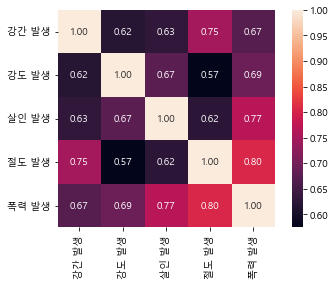

In [416]:
sns.heatmap(cr_corr.values,
            cbar = True,
            annot= True,
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

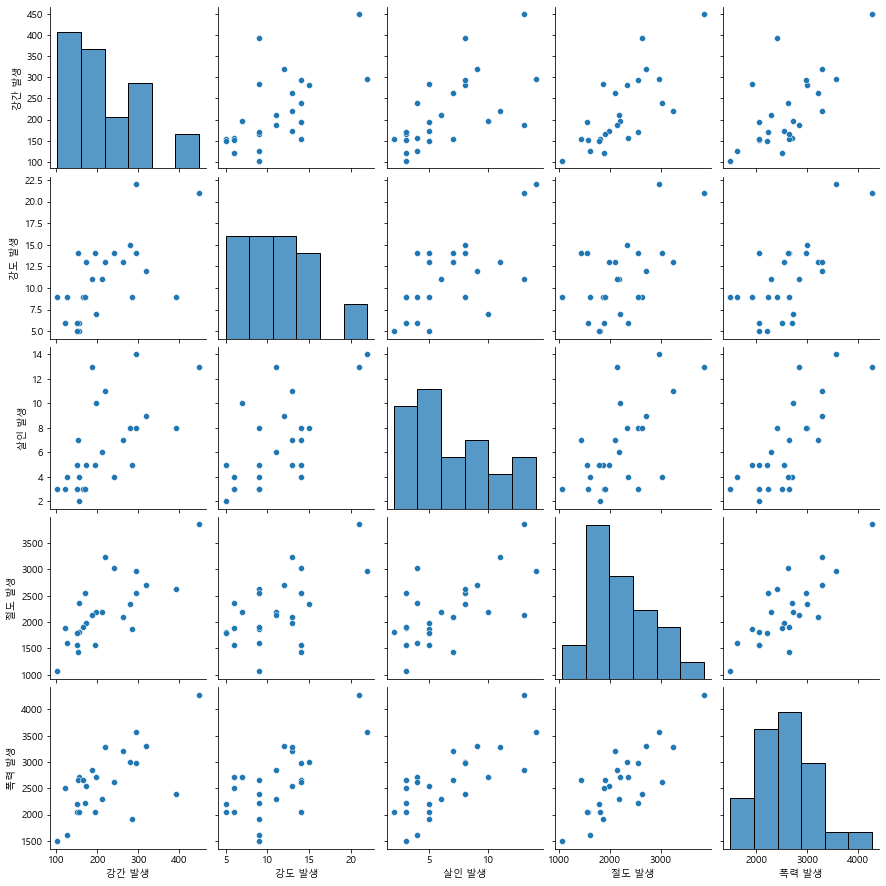

In [417]:
sns.pairplot(crime_seoul2, height=2.5)
plt.show()

In [420]:
#4.5대 범죄의 합을 구하고 데이터 프레임으로 만들어보자.
print(crime_seoul2['강간 발생'].sum())
print(crime_seoul2['강도 발생'].sum())
print(crime_seoul2['살인 발생'].sum())
print(crime_seoul2['절도 발생'].sum())
print(crime_seoul2['폭력 발생'].sum())
#merge이용해서 아까했던 cctv데이터프레임이랑 합쳐보기

5449
276
163
55307
65206


In [421]:
crime_total = pd.DataFrame({'강간 발생':[5449],'강도 발생':[276],'살인 발생':[163],
                            '절도 발생':[55307],'폭력 발생':[65206]})
crime_total

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생
0,5449,276,163,55307,65206


In [ ]:
5.합을 구한 데이터 프레임을 시각화 해보자.(bar차트로)
6.상관도 